# Spectra Plots
By Iandeep Singh Hothi

Plate: 4564

MJD: 55570

Date: 09-01-2011 (DD-MM-YYYY)

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt 
import random

In [2]:
class Spectra: 
    def __init__():[]
   
    def __init__(self, HDU0 ):
        self.HDU0


In [3]:
list = fits.open('D:\Data\Training\spPlate-4564-55570.fits',memmap=True)#opening file


In [4]:
list.info()

Filename: D:\Data\Training\spPlate-4564-55570.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     212   (4658, 1000)   float32   
  1  IVAR        ImageHDU        16   (4658, 1000)   float32   
  2  ANDMASK     ImageHDU        15   (4658, 1000)   int32   
  3  ORMASK      ImageHDU        15   (4658, 1000)   int32   
  4  WAVEDISP    ImageHDU        16   (4658, 1000)   float32   
  5  PLUGMAP     BinTableHDU     88   1000R x 35C   [5J, 6A, D, D, 5E, E, E, E, 16A, D, D, J, J, J, J, J, J, E, 15A, E, E, J, K, K, K, K, J, 5A, J, J, J, 5E, 5E, 5J, E]   
  6  SKY         ImageHDU         8   (4658, 1000)   float32   


Okay, here's how i think it works. A single object has corresponding data in each of the above. Primary HDU will contain the flux data, BinTableHDU has info on the object. 

So, the task now is to use the RA and Dec from the previous 'redshift' code to identify quasars, stars and galaxies and produce plots. Do a few quasar plots

In [5]:
primhdu = list[0]
wav_log = primhdu.header['COEFF0']
cent_wav = 10**wav_log
cent_wav

3556.3131856898544

From (http://www.sdss.org/dr12/spectro/spectro_basics/) : 'About the Spectra', we  know:


<h5><center>log($\lambda_{i+1}$) - log($\lambda_{i}$)=0.0001.</center></h5>

I will use this, and the first pixels central wavelength, to produce the wavelength array for this plate. This will be done by finding the plate wavelength ratio: 

<h3><center>$\frac{\lambda_{i+1}}{\lambda_{i}}= 10^{0.0001}$.</center></h3>


In [6]:
wav_ratio = 10**0.0001

In [7]:
array_elements = primhdu.data[1].size -1
append_count = 0
wavelengths = []
wavelengths.append(cent_wav)
current_wav = cent_wav

In [8]:
while append_count < array_elements:
    current_wav = current_wav*wav_ratio
    wavelengths.append(current_wav)
    append_count=append_count+1

In [9]:
flux_data = list[0].data


In [10]:
trial_object = flux_data[0].data


In [11]:
Bin_info = list[5].data
Bin_info.size

1000

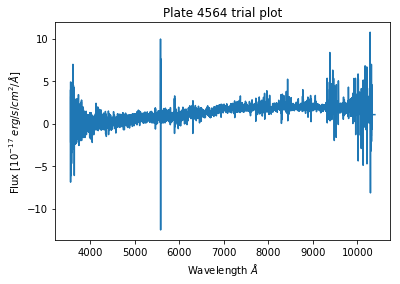

In [12]:
plt.plot(wavelengths,trial_object)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Plate 4564 trial plot')
plt.show()

# Classes:

Not Insepcted = 0

star = 1 

quasar =3

galaxy=4

bal=30

In [13]:
class Object:
    
    def __init__():[]
   
    def __init__(self, SDSS_NAME, R, D, PSFFLUX, PSFMAG, Z_VI, CLASS_P, p, mjd, fid):
        #leaving out redshift for now
        R = round(R,2)
        D =  round(D,2)
        self.name = SDSS_NAME
        self.RA = R
        self.Dec = D
        self.flux = PSFFLUX
        self.Mag = PSFMAG
        self.z = Z_VI
        self.Class_p = CLASS_P
        self.Plate = p
        self.MJD = mjd
        self.FiberID = fid

# For Plate 4564 only

In [14]:
list1 = fits.open('Superset_DR12Q.fits',memmap=True)#opening file
super=list1[1].data # storing  BINTABLE extension data
CurrentObject = 0
Use2=[]
while CurrentObject < len(super):
    Current = super[CurrentObject]
    ##TO MAKE SURE WE ONLY GET DATA FROM RELEVANT PLATE###
    if Current['PLATE'] == 4564:
        
        Object2 = Object(Current['SDSS_NAME'], Current['RA'], Current['Dec'], Current['PSFFLUX'],
                         Current['PSFMAG'], Current['Z_VI'], Current['CLASS_PERSON'],
                         Current['PLATE'] , Current['MJD'], Current['FIBERID'])
        Use2.append(Object2)
    CurrentObject=CurrentObject+1

In [15]:
super.shape

(546856,)

### Quasar plots:


In [16]:
### we are going to randomise selection of a class### 
not_quasar = True
current_quasar = Use2[0]
while not_quasar:
    pot_quasar = random.choice(Use2)
    if (pot_quasar.Class_p == 3):
        not_quasar = False
        current_quasar = pot_quasar
        print(current_quasar.name)
        print(current_quasar.Plate)
        print(current_quasar.FiberID)
        print(current_quasar.MJD)
    

102705.28+350627.5
4564
136
55570


In [17]:
##The Bin table contains information about each object on the plate 
Bin_info = list[5].data
## Dummy object to initialise
plate_quasar = Bin_info[5]
print(current_quasar.RA)
print(current_quasar.Dec)
mjd_quasar = current_quasar.MJD
fiberid_quasar = current_quasar.FiberID
print(mjd_quasar)

156.77
35.11
55570


In [18]:
#no_match = True
#element=0
#while no_match:
#    plate_quasar = Bin_info[713]
#    #current_RA = round(plate_quasar['RA'],2)
#    #Current_Dec = round(plate_quasar['Dec'],2)
#    #if (current_RA == current_quasar.RA) &   (Current_Dec == current_quasar.Dec):
#    if fiberid_quasar == plate_quasar['FiberID']:    
#        no_match = False
#    else:
#        element=element+1

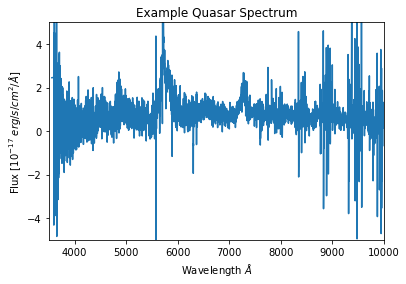

In [46]:
plot_quasar = flux_data[713].data
plt.plot(wavelengths,plot_quasar)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Example Quasar Spectrum')
plt.xlim(3500,10000)
plt.ylim(-5,5)
plt.show()


889, 713 are good quasar examples

### Galaxy plots


In [36]:
### we are going to randomise selection ### 
not_gal = True
current_gal = Use2[0]
while not_gal:
    pot_gal = random.choice(Use2)
    if (pot_gal.Class_p == 4):
        not_gal = False
        current_gal = pot_gal
        print(current_gal.name)
        print(current_gal.Plate)
    

102453.95+350744.6
4564


In [37]:
Bin_info = list[5].data
plate_gal = Bin_info[5]
print(current_gal.RA)
print(current_gal.Dec)

156.22
35.13


In [38]:
no_match = True
element=0
while no_match:
    plate_gal = Bin_info[element]
    current_RA = round(plate_gal['RA'],2)
    Current_Dec = round(plate_gal['Dec'],2)
    if (current_RA == current_gal.RA) &   (Current_Dec == current_gal.Dec):
        
        no_match = False
    else:
        element=element+1

383


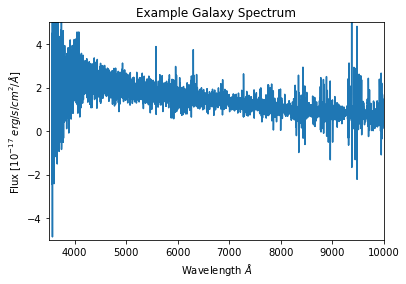

In [44]:
plot_gal= flux_data[element].data
plt.plot(wavelengths,plot_gal)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Example Galaxy Spectrum')
plt.xlim(3500,10000)
plt.ylim(-5,5)
print(element)
plt.show()

In [ ]:
bin_wav = Bin_Size*0.829026074968624
bin_max = 3600
i=0
cwav=[]
while i<800:
    cwav.append(bin_max+(bin_wav*0.5))
    bin_max = bin_max+bin_wav
    i=i+1

### Star plot

In [40]:
### we are going to randomise selection ### 
not_star = True
current_star = Use2[0]
while not_star:
    pot_star = random.choice(Use2)
    if (pot_star.Class_p == 1):
        not_star = False
        current_star = pot_star
        print(current_star.name)
        print(current_star.Plate)
    

102144.12+352041.5
4564


In [41]:
Bin_info = list[5].data
plate_star = Bin_info[5]
print(current_star.RA)
print(current_star.Dec)

155.43
35.34


In [42]:
no_match = True
element=0
while no_match:
    plate_star = Bin_info[element]
    current_RA = round(plate_star['RA'],2)
    Current_Dec = round(plate_star['Dec'],2)
    if (current_RA == current_star.RA) &   (Current_Dec == current_star.Dec):
        
        no_match = False
    else:
        element=element+1

383


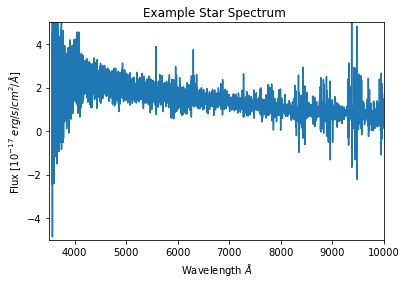

In [45]:
plot_star= flux_data[element].data
plt.plot(wavelengths,plot_star)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Example Star Spectrum ')
plt.xlim(3500,10000)
plt.ylim(-5,5)
print(element)
plt.show()